# MODELO DE CLASIFICACIÓN

# CALIDAD DEL AGUA

#### Importar librerías

In [149]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
#Librerías para visualizar el arbol de decisión
import matplotlib.pyplot as plt
from sklearn import tree

#### Carga de datos

In [61]:
# Se cargan los datos. 
data = pd.read_excel(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MODELOS PREDICTIVOS CON ML PYTHON ejercicios\6. Ejercicio clasificación calidad agua\Calidad_Agua_Dataset.xlsx')

In [63]:
# Cantidad de datos y número de variables
data.shape

(3276, 10)

In [65]:
# Mostrar los datos
data.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,?,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,NO
1,3.72,129.42,18630.06,6.64,?,592.89,15.18,56.33,4.50,NO
2,8.1,224.24,19909.54,9.28,?,418.61,16.87,66.42,3.06,NO
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32,4.08,NO


#### Descripción de los datos

In [67]:
# Ver el tipo de datos
data.dtypes

pH                   object
Dureza              float64
Sólidos             float64
Cloraminas          float64
Sulfatos             object
Conductividad       float64
Carbono_orgánico    float64
Trihalometanos       object
Turbidez            float64
Potabilidad          object
dtype: object

In [69]:
# Se realiza el perfilamiento de los datos. Se genera información de tipo descriptivo para cada una de las variables numéricas.
data.describe()

,Dureza,Sólidos,Cloraminas,Conductividad,Carbono_orgánico,Turbidez
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369481,22014.092415,7.122241,426.205171,14.284921,3.966731
std,32.879680,8768.570852,1.583143,80.824123,3.308232,0.780354
min,47.430000,320.940000,0.350000,181.480000,2.200000,1.450000
25%,176.847500,15666.687500,6.130000,365.735000,12.070000,3.440000
50%,196.965000,20927.830000,7.130000,421.885000,14.220000,3.955000
75%,216.670000,27332.760000,8.112500,481.790000,16.560000,4.500000
max,323.120000,61227.200000,13.130000,753.340000,28.300000,6.740000


In [71]:
# Categorías que se presentan en la variable categórica "pH" y en qué proporción.
pd.Series(data['pH']).value_counts()

pH
?        491
6.28      15
7.37      14
6.62      14
7.61      14
        ... 
9.02       1
10.02      1
9.72       1
9.8        1
5.13       1
Name: count, Length: 700, dtype: int64

In [73]:
# Categorías que se presentan en la variable categórica "Sulfatos" y en qué proporción.
pd.Series(data['Sulfatos']).value_counts()

Sulfatos
?         781
334.05      4
367.33      3
339.06      3
343.49      3
         ... 
361.38      1
335.67      1
349.17      1
244.8       1
345.7       1
Name: count, Length: 2304, dtype: int64

In [75]:
# Categorías que se presentan en la variable categórica "Trihalometanos" y en qué proporción.
pd.Series(data['Trihalometanos']).value_counts()

Trihalometanos
?        162
56.35      4
66.69      4
70.83      4
70.37      4
        ... 
55.39      1
94.34      1
74.57      1
35.57      1
78.7       1
Name: count, Length: 2404, dtype: int64

In [77]:
# Categorías que se presentan en la variable categórica "Potabilidad" y en qué proporción.
pd.Series(data['Potabilidad']).value_counts()

Potabilidad
NO    1998
SI    1278
Name: count, dtype: int64

#### Limpieza y preparación de los datos

In [79]:
# Ver los valores nulos
data.isna().sum()

pH                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfatos            0
Conductividad       0
Carbono_orgánico    0
Trihalometanos      0
Turbidez            0
Potabilidad         0
dtype: int64

In [81]:
# Ver los duplicados
data.duplicated().sum()

0

In [83]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data_t = data

In [85]:
# Eliminación data vacía
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()

In [87]:
# Cantidad de datos y número de variables
data_t.shape

(3276, 10)

In [ ]:
# Conventir las variables object a float ('pH', 'Sulfatos', 'Trihalometanos', 'Potabilidad')

In [89]:
# Convertir la columna 'pH' de object a float
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')

In [91]:
# Convertir la columna 'Sulfatos' de object a float
data['Sulfatos'] = pd.to_numeric(data['Sulfatos'], errors='coerce')

In [93]:
# Convertir la columna 'Trihalometanos' de object a float
data['Trihalometanos'] = pd.to_numeric(data['Trihalometanos'], errors='coerce')

In [95]:
# Convertir la columna 'Trihalometanos' de object a float
data['Trihalometanos'] = pd.to_numeric(data['Trihalometanos'], errors='coerce')

In [97]:
# Se realiza el perfilamiento de los datos. Se genera información de tipo descriptivo para cada una de las variables numéricas.
data.describe()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080804,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731
std,1.594369,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354
min,0.000000,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000
25%,6.090000,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000
50%,7.040000,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000
75%,8.060000,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000
max,14.000000,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000


In [99]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Aunque la representación de esta 
# variable sea numérica, la tarea a resolver seguirá siendo una clasificación.
# Primero tenemos que generar el objeto.
codificacion = LabelEncoder()

In [101]:
# Ahora se ajusta a los datos.
data_t['Potabilidad']=codificacion.fit_transform(data_t['Potabilidad'])

In [103]:
# Visualización de la clase. Observamos que ahora la categoría "SI" está codificada con un "1" y la clase "NO" con un "0"
data_t['Potabilidad'].value_counts()

Potabilidad
0    1998
1    1278
Name: count, dtype: int64

In [105]:
# Podemos ver cómo quedaron nuestro datos.
data_t.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,?,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,?,592.89,15.18,56.33,4.50,0
2,8.1,224.24,19909.54,9.28,?,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32,4.08,0


In [107]:
# Cantidad de datos y número de variables
data_t.shape

(3276, 10)

In [115]:
# Reemplazar '?' por np.nan en todo el DataFrame
data_t.replace('?', np.NaN, inplace=True)

In [117]:
# Podemos ver cómo quedaron nuestro datos.
data_t.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.1,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32,4.08,0


In [119]:
# Eliminar filas que contienen al menos un NaN
data_t = data_t.dropna()

In [121]:
# Podemos ver cómo quedaron nuestro datos.
data_t.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32,4.08,0
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,0
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.6,2.67,0
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.8,4.40,0


In [123]:
# Cantidad de datos y número de variables
data_t.shape

(2011, 10)

#### Construcción del modelo sin búsqueda de hiperparámetros

In [125]:
# Se selecciona la variable objetivo, en este caso "Renuncia".
Y=data_t['Potabilidad']
# Del conjunto de datos se elimina la variable "Renuncia".
X=data_t.drop(['Potabilidad'], axis=1)

In [127]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [129]:
# Creación del objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [131]:
# Entrenamiento del modelo de arbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train,Y_train)

In [133]:
# Podemos determinar la exactitud del modelo sobre los datos de test, para determinar su rendimiento de generalización. Esta, y
# otras métricas las estudiaremos en las siguientes lecciones.
y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))

Exactitud: 0.60


In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [137]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[164,  88],
       [ 72,  79]], dtype=int64)

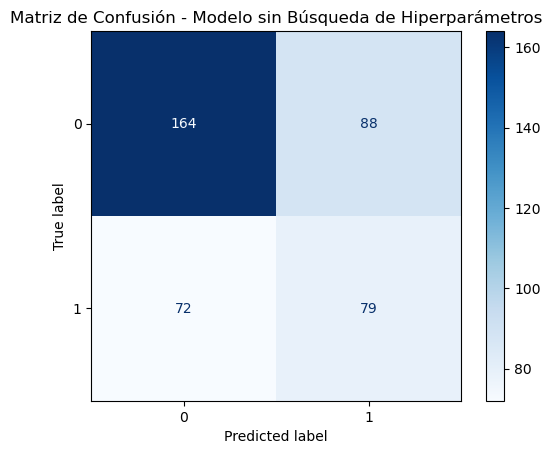

In [139]:
# Graficar la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Modelo sin Búsqueda de Hiperparámetros')
plt.show()

In [145]:
# Imprimir las métricas
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.60
Recall: 0.5231788079470199
Precisión: 0.47305389221556887
Puntuación F1: 0.4968553459119497


In [151]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       252
           1       0.47      0.52      0.50       151

    accuracy                           0.60       403
   macro avg       0.58      0.59      0.58       403
weighted avg       0.61      0.60      0.61       403



In [153]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía. Se indica que mejore el balance de clases (aunque no es 
# necesario, pues en este caso están bien balanceados los datos)
arbol = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       252
           1       0.47      0.52      0.49       151

    accuracy                           0.60       403
   macro avg       0.58      0.58      0.58       403
weighted avg       0.61      0.60      0.60       403



#### Interpretación del modelo

In [156]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el cual nos devuelve 
# un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable asociada.
importancia= arbol.feature_importances_
importancia

array([0.1431626 , 0.1130401 , 0.12350487, 0.14228706, 0.13203349,
       0.08032249, 0.11028751, 0.09619518, 0.0591667 ])

In [158]:
# Ver en orden de importancia
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,pH,0.143163
1,Cloraminas,0.142287
2,Sulfatos,0.132033
3,Sólidos,0.123505
4,Dureza,0.113040
5,Carbono_orgánico,0.110288
6,Trihalometanos,0.096195
7,Conductividad,0.080322
8,Turbidez,0.059167


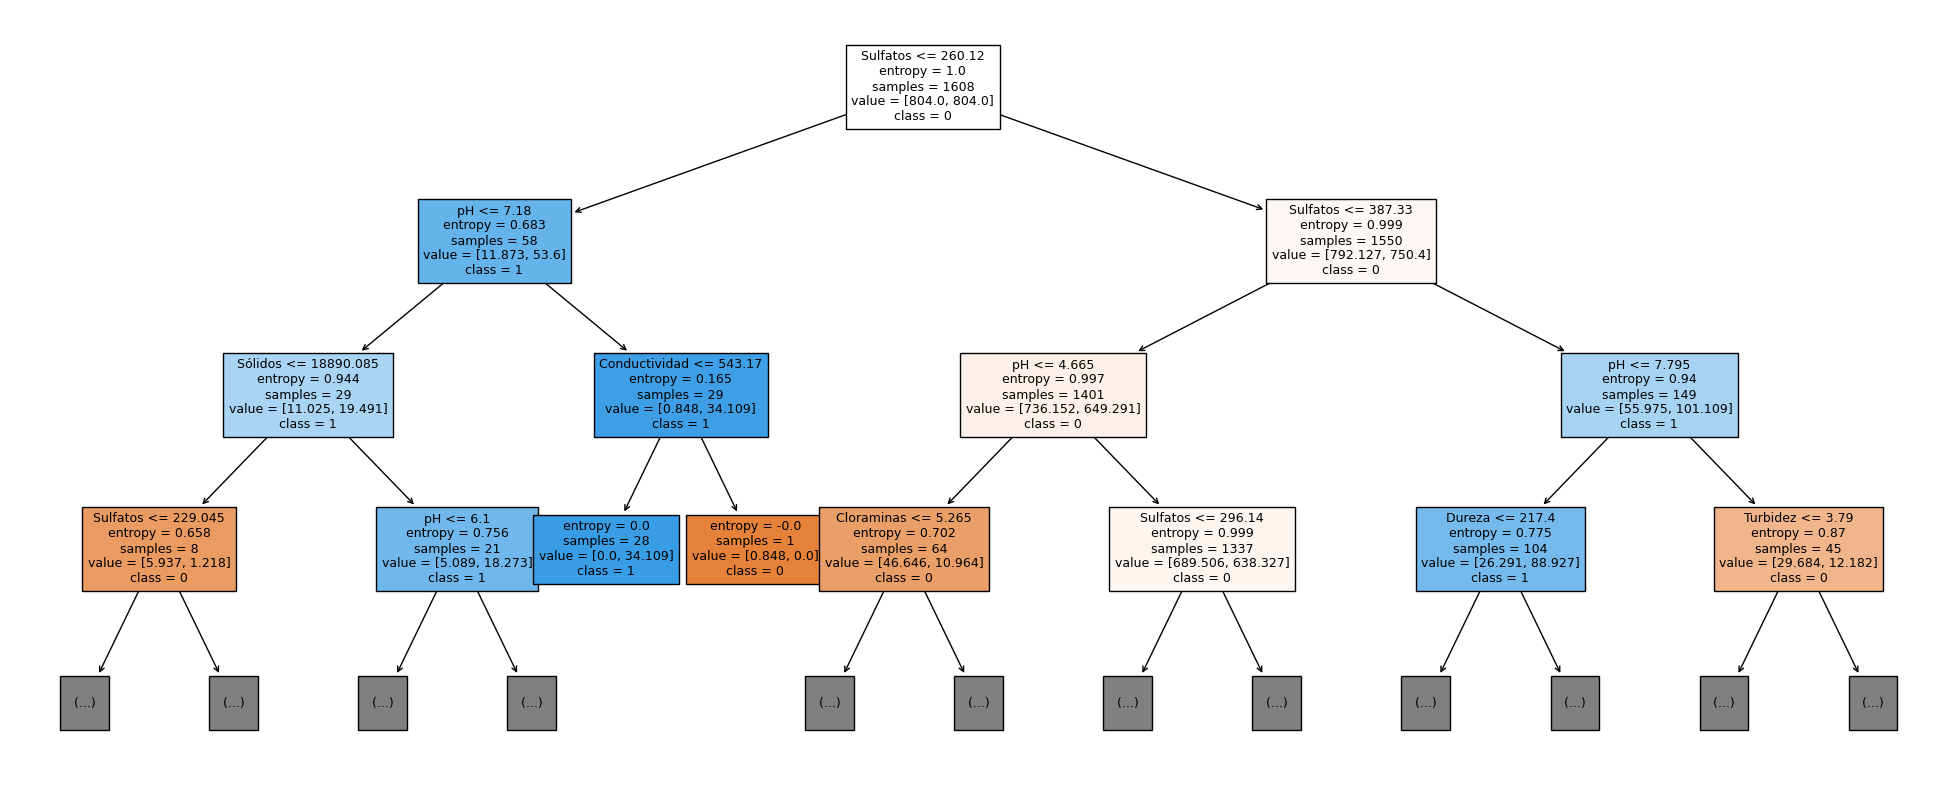

In [160]:
# Graficar el árbol, con profundidad máxima de 3
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [257]:
# También podemos guardar esta figura como una imagen.
fig.savefig("decistion_tree.png")

#### Construcción de modelo con hiperparámetros

In [163]:
# Librerías para manejo de datos
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import accuracy_score
# Para el reporte de rendimiento con métricas de clasificación 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt

#### Modelo con hiperparámetros

En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno

Para determinar los mejores valores de estos hiperparámetros vamos a realizar la búsqueda utilizando la función GridSearchCV.SearchCV.

In [174]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [176]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,12],'min_samples_split':[3, 4, 5]}

In [178]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [180]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [3, 4, 5]})

In [182]:
# Podemos ver cual fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}

In [184]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[164,  88],
       [ 73,  78]], dtype=int64)

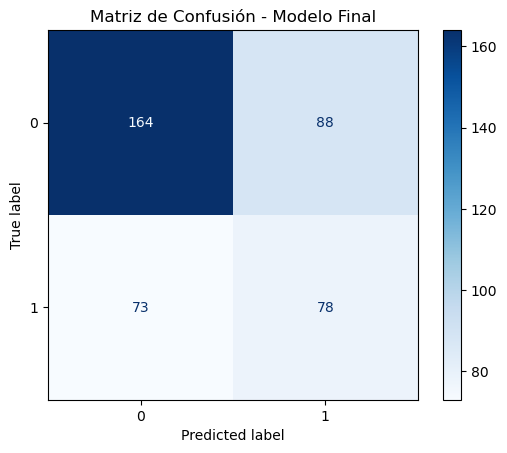

In [186]:
# Graficar la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Modelo Final')
plt.show()

In [188]:
# Imprimir las métricas
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.60
Recall: 0.5165562913907285
Precisión: 0.46987951807228917
Puntuación F1: 0.4921135646687697


In [190]:
# Obtener el mejor modelo.
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
# # Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       252
           1       0.46      0.61      0.53       151

    accuracy                           0.59       403
   macro avg       0.59      0.59      0.58       403
weighted avg       0.62      0.59      0.60       403



#### Interpretación del modelo

In [192]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el cual nos devuelve 
# un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable asociada.
importancia= modelo_final.feature_importances_
importancia

array([0.21569214, 0.12172624, 0.12243164, 0.14660628, 0.18739184,
       0.04162741, 0.06006065, 0.03335173, 0.07111207])

In [195]:
# Ver en orden de importancia
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,pH,0.215692
1,Sulfatos,0.187392
2,Cloraminas,0.146606
3,Sólidos,0.122432
4,Dureza,0.121726
5,Turbidez,0.071112
6,Carbono_orgánico,0.060061
7,Conductividad,0.041627
8,Trihalometanos,0.033352


#### Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión también podríamos obtener la probabilidad de que un dato sea clasificado como de una clase particular. 

In [198]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba". Con eso predecimos cuál es la probabilidad de que el dato
# en la pocisión 20 (la muestra número 21) sea no potable.
y_pred_test = modelo_final.predict_proba(X_test.iloc[[20]])

In [200]:
# Esto me dice que tiene un 100% de probabilidad de ser no potable y un 0% de probabilidad ser potable.
print(y_pred_test)

[[1. 0.]]


In [202]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
modelo_final.classes_
# Esto quiere decir que los datos están ordenados en clase 0 (no potable) y 1 (potable)

array([0, 1])

## ¿Qué puedes decir de los valores de las métricas recall y precisión para cada una de las clases? 

clase 0 es no potable, clase 1 es potable.

* precision: 

clase 0 = 0.71 (cuando el modelo predice que no es potable acierta un 71% de las veces, hay buena precisión)

clase 1 = 0.46 (cuando dice que el agua es potable, solo acierta el 46% de las veces, hay muchos falsos positivos).)

* recall: 

clase 0 = 0.58 (de todas las aguas realmente no potables, solo detecta el 58%, es muy bajo)

clase 1 = 0.61 (identifica el 61% de los casos realmente potables, es medio bajo)


El modelo es conservador al declarar que el agua es no potable (evita falsos positivos), pero se le escapan algunos casos que sí lo son (falsos negativos). Sin embargo, el modelo es relativamente bueno detectando aguas potables, pero falla mucho al confirmar que lo son (alto riesgo de decir que algo es potable cuando no lo es).


## ¿Cuál de estás métricas consideras que es más importante con base en la descripción del problema y objetivos? 

En contextos como calidad del agua, los falsos positivos en clase 1 (decir que es potable cuando no lo es) pueden tener consecuencias graves para la salud. Por eso, deberías priorizar una alta precisión en clase 1, aunque eso implique un menor recall.

Dado el contexto del problema —clasificación de agua como potable o no potable— la prioridad debe ser proteger la salud pública, por lo que:

La precisión de la clase 1 (potable) es la más importante.

clase 1 = potable: Si el modelo dice que el agua es potable, debe estar seguro, porque un falso positivo aquí implica decir que el agua es segura cuando en realidad no lo es, lo que puede tener consecuencias graves (enfermedades, brotes infecciosos, pérdida de confianza pública).

En cambio, un falso negativo (decir que el agua no es potable cuando sí lo es) es menos riesgoso: podría llevar a descartar agua segura, pero no pone en riesgo la salud directamente.

## ¿Consideras que el rendimiento del mejor modelo es adecuado? Si no es así ¿Cómo podrían mejorarse los resultados?

El rendimiento del mejor modelo no es adecuado. No es suficientemente confiable para tomar decisiones críticas sobre agua potable.

Detalles:

La precisión de la clase 1 (potable) es 0.46, lo que significa que más de la mitad de las veces el modelo se equivoca al decir que el agua es potable.

Aunque el recall de clase 1 (0.61) es algo mejor, identifica solo 6 de cada 10 aguas realmente potables, lo cual tampoco es óptimo.

La exactitud general del 59% es apenas mejor que lanzar una moneda (especialmente si las clases están desbalanceadas).

En contextos de salud pública, no se puede confiar en un modelo que dice "esto es potable" con solo un 46% de certeza.

Mejorar los resultados:

Revisar el balance de clases: los datos parecen algo desbalanceados (252 vs. 151).
Usar: SMOTE o ADASYN para oversampling.
class_weight='balanced' en modelos como Random Forest.

Probar modelos más robustos:
Random Forest, Gradient Boosting (XGBoost, LightGBM) tienen mejor capacidad predictiva.
También permiten interpretar la importancia de variables.

Ajustar el umbral de decisión:
El modelo puede estar prediciendo con el umbral por defecto de 0.5. Ajustarlo puede mejorar la precisión en clase 1.

Optimización de hiperparámetros:
Usa GridSearchCV o RandomizedSearchCV para encontrar mejores combinaciones de parámetros.


## ¿Cuáles son las variables más significativas según el mejor modelo?

pH = 0.215692

Sulfatos = 0.187392

Cloraminas = 0.146606

Sólidos= 0.122432

Dureza = 0.121726


## Para un árbol de profundidad tres (3), ¿cuáles son las reglas que nos permiten determinar cuándo el agua no está apta para el consumo?

No es apta para consumo (no potable o class = 0) si:

Sulfatos <= 260.12

Sulfatos <= 387.33

pH <= 4.665

Cloramidas <= 5.265
